In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://www.dropbox.com/sh/v6epaau1kh7ofyj/AADOJsX-ghd70tn_ds1aDJtMa?dl=0 -O "/content/drive/MyDrive/Ninti/dataset.zip"

--2023-06-16 08:20:49--  https://www.dropbox.com/sh/v6epaau1kh7ofyj/AADOJsX-ghd70tn_ds1aDJtMa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/v6epaau1kh7ofyj/AADOJsX-ghd70tn_ds1aDJtMa [following]
--2023-06-16 08:20:50--  https://www.dropbox.com/sh/raw/v6epaau1kh7ofyj/AADOJsX-ghd70tn_ds1aDJtMa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc11b17390f4dadafdcb1248e7ae.dl.dropboxusercontent.com/zip_download_get/BheDdpW-CbMt2DKVgXX7xZ2IUs2PXi0SBu0jE0DWElZV6dC9_Dk0P1swtqr2e-ghBjDdqagVwh_TcuwXRjdo8VQRFnbCIsphKeL03R0KoTqnSQ# [following]
--2023-06-16 08:20:51--  https://uc11b17390f4dadafdcb1248e7ae.dl.dropboxusercontent.com/zip_download_get/BheDdpW-CbMt2DKVgXX7xZ2IUs2PXi0SBu0jE0DWElZV6dC9_Dk0P1swtqr2e-ghBjDdqagVwh_TcuwXRjdo8VQRF

In [2]:

import shutil # for file operations
import zipfile, os, sys, random
from glob import glob
import pandas as pd # for data manipulation
import numpy as np # for dealing with arrays
from sklearn import preprocessing # for preprocessing purpose
import cv2 # for displaying the image
from matplotlib import patches # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline


In [3]:
local_zip = '/content/drive/MyDrive/Ninti/dataset.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/Ninti/unzipped_dataset")

In [3]:
# load the annotations data
df = pd.read_csv("/content/drive/MyDrive/Ninti/unzipped_dataset/annotations.csv")
df

image        xmin        ymin        xmax        ymax label
0     image-100.png    0.000000    0.000000   25.190198   40.816803   rbc
1     image-100.png   15.010502    0.000000   68.337223   23.527421   rbc
2     image-100.png   25.017503   16.021004   78.374562   73.735123   rbc
3     image-100.png   75.565928    1.061844  140.248541   45.591599   rbc
4     image-100.png   77.483081   23.290548  131.936989   74.806301   rbc
...             ...         ...         ...         ...         ...   ...
2335   image-69.png  227.765502  207.710259  256.000000  248.054115   rbc
2336   image-69.png  201.832018  211.930101  251.736189  256.000000   rbc
2337   image-69.png   81.188275  231.883878  130.855693  254.391206   rbc
2338   image-69.png   35.903044  244.555806   79.863585  255.066516   rbc
2339   image-69.png  176.896280  244.360767  215.302142  255.741826   rbc

[2340 rows x 6 columns]

In [4]:
# defining some functions for creating the necessary columns
img_width = 256
img_height = 256

def width(df):
  return (df.xmax - df.xmin)
def height(df):
  return (df.ymax - df.ymin)
def x_center(df):
  return (df.xmin + (df.width/2))
def y_center(df):
  return (df.ymin + (df.height/2))
def w_norm(df):
  return df/img_width
def h_norm(df):
  return df/img_height

In [5]:
le = preprocessing.LabelEncoder()
le.fit(df['label'])
print(le.classes_)

['rbc' 'wbc']


In [6]:
# applying the created functions
labels = le.transform(df['label'])
df['label'] = labels

df['width'] = df.apply(width, axis=1)
df['height'] = df.apply(height, axis=1)

df['x_center'] = df.apply(x_center, axis=1)
df['y_center'] = df.apply(y_center, axis=1)

df['x_center_norm'] = df['x_center'].apply(w_norm)
df['width_norm'] = df['width'].apply(w_norm)

df['y_center_norm'] = df['y_center'].apply(h_norm)
df['height_norm'] = df['height'].apply(h_norm)

In [7]:
df

image        xmin        ymin        xmax        ymax  label  \
0     image-100.png    0.000000    0.000000   25.190198   40.816803      0   
1     image-100.png   15.010502    0.000000   68.337223   23.527421      0   
2     image-100.png   25.017503   16.021004   78.374562   73.735123      0   
3     image-100.png   75.565928    1.061844  140.248541   45.591599      0   
4     image-100.png   77.483081   23.290548  131.936989   74.806301      0   
...             ...         ...         ...         ...         ...    ...   
2335   image-69.png  227.765502  207.710259  256.000000  248.054115      0   
2336   image-69.png  201.832018  211.930101  251.736189  256.000000      0   
2337   image-69.png   81.188275  231.883878  130.855693  254.391206      0   
2338   image-69.png   35.903044  244.555806   79.863585  255.066516      0   
2339   image-69.png  176.896280  244.360767  215.302142  255.741826      0   

          width     height    x_center    y_center  x_center_norm  width_norm  \
0     25.190198  40.816803   12.595099   20.408401       0.049200    0.098399   
1     53.326721  23.527421   41.673862   11.763711       0.162789    0.208308   
2     53.357060  57.714119   51.696033   44.878063       0.201938    0.208426   
3     64.682614  44.529755  107.907235   23.326721       0.421513    0.252666   
4     54.453909  51.515753  104.710035   49.048425       0.409024    0.212711   
...         ...        ...         ...         ...            ...         ...   
2335  28.234498  40.343856  241.882751  227.882187       0.944854    0.110291   
2336  49.904171  44.069899  226.784104  233.965051       0.885875    0.194938   
2337  49.667418  22.507328  106.021984  243.137542       0.414148    0.194013   
2338  43.960541  10.510710   57.883315  249.811161       0.226107    0.171721   
2339  38.405862  11.381060  196.099211  250.051297       0.766013    0.150023   

      y_center_norm  height_norm  
0          0.079720     0.159441  
1          0.045952     0.091904  
2          0.175305     0.225446  
3          0.091120     0.173944  
4          0.191595     0.201233  
...             ...          ...  
2335       0.890165     0.157593  
2336       0.913926     0.172148  
2337       0.949756     0.087919  
2338       0.975825     0.041057  
2339       0.976763     0.044457  

[2340 rows x 14 columns]

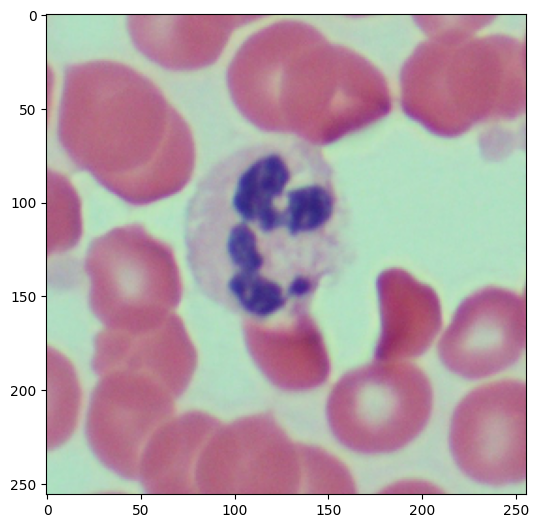

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
image = plt.imread('/content/drive/MyDrive/Ninti/unzipped_dataset/images/image-23.png')
plt.imshow(image)

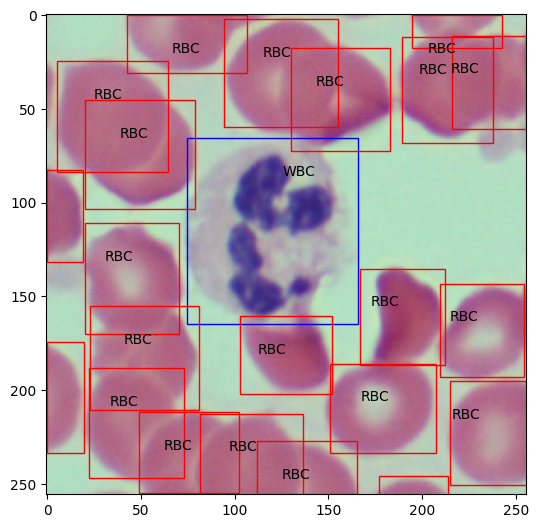

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
image = plt.imread('/content/drive/MyDrive/Ninti/unzipped_dataset/images/image-23.png')

# iterating over the image for different objects
for _,row in df[df.image == "image-23.png"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    width = xmax - xmin
    height = ymax - ymin

    # assign different color to different classes of objects
    if row.label == 0:
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.label == 1:
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))

    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')

    ax.add_patch(rect)
plt.imshow(image)

In [10]:
# data splitting
df_train = df[0:2099]
df_val = df[2099:]
print(df_train.shape, df_val.shape)

(2099, 14) (241, 14)


In [ ]:
# creating some folders for data segregation purpose

path = "/content/drive/MyDrive/Ninti/unzipped_dataset/"

os.mkdir(path+'cells/')

os.mkdir(path+'cells/images/')
os.mkdir(path+'cells/images/train/')
os.mkdir(path+'cells/images/val/')

os.mkdir(path+'cells/labels/')
os.mkdir(path+'cells/labels/train/')
os.mkdir(path+'cells/labels/val/')

In [11]:
%%time

# creating a function for data segregation
def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
  filenames = []
  for filename in df.image:
    filenames.append(filename)
  filenames = set(filenames)

  for filename in filenames:
    yolo_list = []

    for _,row in df[df.image == filename].iterrows():
      yolo_list.append([row.label, row.x_center_norm, row.y_center_norm, row.width_norm, row.height_norm])

    yolo_list = np.array(yolo_list)
    txt_filename = os.path.join(train_label_path,str(row.image.split('.')[0])+".txt")
    # Save the .img & .txt files to the corresponding train and validation folders
    np.savetxt(txt_filename, yolo_list, fmt=["%d", "%f", "%f", "%f", "%f"])
    shutil.copyfile(os.path.join(img_path,row.image), os.path.join(train_img_path,row.image)) # file copy(source, dest)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [12]:
%%time

path = "/content/drive/MyDrive/Ninti/unzipped_dataset/"

src_img_path = path+"/images/"
src_label_path = path+"/annotations.csv"

train_img_path = path+'cells/images/train/'
train_label_path = path+'cells/labels/train/'

val_img_path = path+'cells/images/val/'
val_label_path = path+'cells/labels/val/'

segregate_data(df_train, src_img_path, src_label_path, train_img_path, train_label_path)
segregate_data(df_val, src_img_path, src_label_path, val_img_path, val_label_path)

CPU times: user 625 ms, sys: 116 ms, total: 741 ms
Wall time: 1min 4s


In [13]:
print("Number of Training images", len(os.listdir(train_img_path)))
print("Number of Training labels", len(os.listdir(train_label_path)))

print("Number of valid images", len(os.listdir(val_img_path)))
print("Number of valid labels", len(os.listdir(val_label_path)))

Number of Training images 90
Number of Training labels 90
Number of valid images 10
Number of valid labels 10


In [14]:
## Yolo v5 model
!git clone 'https://github.com/ultralytics/yolov5.git'

Cloning into 'yolov5'...
remote: Enumerating objects: 15973, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 15973 (delta 84), reused 97 (delta 60), pack-reused 15831
Receiving objects: 100% (15973/15973), 14.63 MiB | 23.71 MiB/s, done.
Resolving deltas: 100% (10957/10957), done.


In [15]:
!pip install -r 'yolov5/requirements.txt'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00


In [16]:
# creaing .yaml file for specifying about the paths, number of classes, and class names
!echo -e "train: '/content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/'\nval: '/content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/val/'\n\nnc: 2\nnames: ['rbc', 'wbc']" >> rbcdet.yaml
!cat 'rbcdet.yaml'

train: '/content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/'
val: '/content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/val/'

nc: 2
names: ['rbc', 'wbc']


In [17]:
# copying the created .yaml file to the yolov5 folder
shutil.copyfile('/content/rbcdet.yaml', '/content/yolov5/rbcdet.yaml')

'/content/yolov5/rbcdet.yaml'

In [18]:
# overwriting the number of class on yolov5s.yaml file
!sed -i 's/nc: 80/nc: 2/g' ./yolov5/models/yolov5s.yaml

In [19]:
!cat './yolov5/models/yolov5s.yaml'

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 2  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [43]:
!python /content/yolov5/detect.py --source /content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/ --img-size 256 --conf-thres 0.001 --exist-ok --name detect_output --weights /content/yolov5/yolov5s.pt --data /content/rbcdet.yaml

detect: weights=['/content/yolov5/yolov5s.pt'], source=/content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/, data=/content/rbcdet.yaml, imgsz=[256, 256], conf_thres=0.001, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=detect_output, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-181-g3812a1a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/90 /content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/image-1.png: 256x256 9 apples, 1 donut, 1 cake, 5 teddy bears, 5.5ms
image 2/90 /content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/image-10.png: 256x256 27 apples, 8.6ms
image 3/90 /content/drive/MyDrive/N

In [20]:
# Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5 🚀 runs in Comet

# TensorBoard: Start with 'tensorboard --logdir yolov5/runs/train', view at http://localhost:6006/

In [21]:
# training the custom data

%%time
!python yolov5/train.py --img 256 --batch 64 --epochs 300 --data=rbcdet.yaml --cfg=yolov5/models/yolov5s.yaml --name rbcd

train: weights=yolov5/yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=rbcdet.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=64, imgsz=256, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=rbcd, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-181-g3812a1a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, 

In [23]:
!cp -r "/content/yolov5" "/content/drive/MyDrive/Ninti"

In [21]:
!python yolov5/detect.py --source /content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/image-106.png --imgsz 256 --weights '/content/drive/MyDrive/Ninti/yolov5/runs/train/rbcd/weights/best.pt' --visualize

detect: weights=['/content/drive/MyDrive/Ninti/yolov5/runs/train/rbcd/weights/best.pt'], source=/content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/image-106.png, data=yolov5/data/coco128.yaml, imgsz=[256, 256], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=True, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-181-g3812a1a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Saving yolov5/runs/detect/exp/image-106/stage0_Conv_features.png... (32/32)
Saving yolov5/runs/detect/exp/image-106/stage1_Conv_features.png... (32/64)
Saving yolov5/runs/detect/exp/image-106/stage2_C3_features.png... (32/64)
Saving yo

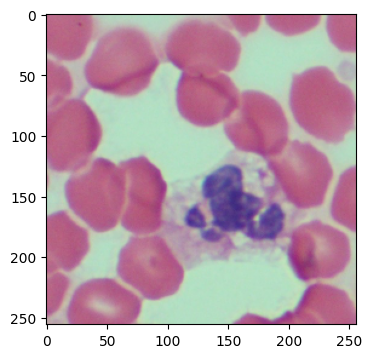

In [31]:
inp_img = "/content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/image-106.png"
fig=plt.figure(figsize=(4, 5))
img = plt.imread(inp_img)
plt.imshow(img)
plt.show()

In [ ]:
fig=plt.figure(figsize=(4, 5))
img = plt.imread('yolov5/runs/detect/exp2/image-106.png')
plt.imshow(img)
plt.show()

In [48]:

import glob

# Get the list of filenames in the folder
folder_path = '/content/yolov5/runs/detect/exp/image-106'
img_path = glob.glob(folder_path + '/*.png')
print(img_path)

img_name = []
for i in img_path:
  x = img_path[0][len(folder_path)+1:]
  img_name.append(x)
print(img_name)


['/content/yolov5/runs/detect/exp/image-106/stage12_Concat_features.png', '/content/yolov5/runs/detect/exp/image-106/stage8_C3_features.png', '/content/yolov5/runs/detect/exp/image-106/stage22_Concat_features.png', '/content/yolov5/runs/detect/exp/image-106/stage3_Conv_features.png', '/content/yolov5/runs/detect/exp/image-106/stage10_Conv_features.png', '/content/yolov5/runs/detect/exp/image-106/stage13_C3_features.png', '/content/yolov5/runs/detect/exp/image-106/stage2_C3_features.png', '/content/yolov5/runs/detect/exp/image-106/stage19_Concat_features.png', '/content/yolov5/runs/detect/exp/image-106/stage1_Conv_features.png', '/content/yolov5/runs/detect/exp/image-106/stage17_C3_features.png', '/content/yolov5/runs/detect/exp/image-106/stage5_Conv_features.png', '/content/yolov5/runs/detect/exp/image-106/stage16_Concat_features.png', '/content/yolov5/runs/detect/exp/image-106/stage6_C3_features.png', '/content/yolov5/runs/detect/exp/image-106/stage15_Upsample_features.png', '/content

In [28]:
### download the font and send upload to gdrive
### good fonts can be easily downloaded from google fonts

%cd /content/drive/MyDrive/
!cp "/content/drive/MyDrive/Colab Notebooks/AI-Generation_SEGmnt/Inpaint_Seg/fonts/Bruno_Ace_SC/BrunoAceSC-Regular.ttf" /usr/share/fonts/truetype/
!fc-cache -f -v

/content/drive/MyDrive
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 1 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [50]:
from PIL import Image, ImageDraw, ImageFont
import torchvision.transforms as transforms
from PIL import Image

import torch
import torchvision.transforms as transforms

def create_image_grid(input_image, output_image_path, image_names, rows, columns):

    pil_images = []
    # Open the image in PIL format
    for i in output_image_path:
      image = Image.open(i)
      pil_images.append(image)

    input_image = Image.open(input_image)

    # Add the main image to the list of images
    pil_images = [input_image] + pil_images
    image_names = ['Original Image'] + image_names

    # Converting to tensor so to use sigmoid function
    transform = transforms.Compose([
        transforms.Resize((256, 256)),  # Resize the image to 256x256 pixels
        transforms.ToTensor(),  # Convert the image to a PyTorch tensor
        torch.Sigmoid()
    ])
    # Apply the transformation to the image
    tensor = transform(pil_images)

    # converting back to PIL Image format

    transform = transforms.ToPILImage()
    pil_images = [transform(t) for t in tensor]

    # Calculate the size of the grid image
    img_width, img_height = pil_images[1].size
    grid_width = img_width * columns + (columns - 1) * 20
    grid_height = img_height * rows + (rows - 1) * 10 + 30 * rows

    # Create a blank grid image
    grid_image = Image.new('RGB', (grid_width, grid_height), color='grey')
    draw = ImageDraw.Draw(grid_image)

    # font customize
    font = ImageFont.truetype('BrunoAceSC-Regular.ttf', size=24)

    # Add images and names to the grid
    for i in range(rows):
        for j in range(columns):
            index = i * columns + j
            if index < len(pil_images):
                img = pil_images[index]
                x_offset = j * (img_width + 10)
                y_offset = i * (img_height + 40)
                grid_image.paste(img, (x_offset, y_offset))
                text_width, text_height = draw.textsize(image_names[index], font)
                text_x = x_offset + (img.size[0] - text_width) // 2
                text_y = y_offset + img.size[1]
                draw.text((text_x, text_y), image_names[index], font=font, fill='black')

    grid_image.save('/content/drive/MyDrive/Ninti/yolo_layers.png')
    return grid_image

In [ ]:



# Define the transformation to apply to the image
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image to 256x256 pixels
    transforms.ToTensor()  # Convert the image to a PyTorch tensor
])

# Apply the transformation to the image
tensor = transform(image)

# Print the shape of the tensor
print(tensor.shape)

In [54]:
create_image_grid(inp_img, img_path, img_name, 9, 3)